In [2]:
# includes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from tqdm.notebook import tqdm

import pickle
import os

In [3]:
yr0 = 2013
yr1 = 2022

years = np.arange(yr0,yr1+1)

In [3]:
df_import = pd.read_excel('./resouces/processed/DOT_import_2013_2022.xlsx')
df_import

,Country Code,Counterpart Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,1,1.883500e+13,1.893840e+13,1.658520e+13,1.614960e+13,1.774740e+13,1.955330e+13,1.900180e+13,1.750240e+13,2.226740e+13,2.515010e+13
1,1,80,2.226700e+12,2.076360e+12,1.322770e+12,1.117610e+12,1.363280e+12,1.703360e+12,1.535570e+12,1.126620e+12,1.677990e+12,2.326700e+12
2,1,92,5.691790e+12,5.885160e+12,5.498660e+12,5.442470e+12,6.031860e+12,6.572300e+12,6.515050e+12,6.264030e+12,8.033570e+12,9.026420e+12
3,1,110,1.049660e+13,1.057370e+13,9.414340e+12,9.284420e+12,1.011100e+13,1.102020e+13,1.071070e+13,9.875310e+12,1.219840e+13,1.349780e+13
4,1,111,1.515160e+12,1.559700e+12,1.449980e+12,1.391360e+12,1.502430e+12,1.636700e+12,1.598460e+12,1.396040e+12,1.732730e+12,2.099470e+12
...,...,...,...,...,...,...,...,...,...,...,...,...
29121,998,963,4.268889e+09,4.393604e+09,3.845218e+09,4.160622e+09,4.785587e+09,5.524818e+09,4.903079e+09,4.643977e+09,6.890210e+09,7.295351e+09
29122,998,964,1.354080e+11,1.470070e+11,1.384280e+11,1.462010e+11,1.650600e+11,1.867950e+11,1.889340e+11,1.926610e+11,2.418130e+11,2.579180e+11
29123,998,967,1.629636e+08,1.259450e+08,1.145961e+08,7.887471e+07,1.001437e+08,1.139400e+08,1.452591e+08,1.897987e+08,2.978714e+08,2.943076e+08
29124,998,968,3.902588e+10,4.379227e+10,3.929094e+10,4.242554e+10,4.886156e+10,5.706042e+10,5.460603e+10,4.825278e+10,5.913308e+10,6.499514e+10


In [4]:
df_export = pd.read_excel('./resouces/processed/DOT_export_2013_2022.xlsx')
df_export

,Country Code,Counterpart Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,1,1.874810e+13,1.881840e+13,1.640550e+13,1.587800e+13,1.754940e+13,1.932910e+13,1.875490e+13,1.736720e+13,2.207400e+13,2.449870e+13
1,1,80,1.307330e+12,1.293960e+12,1.031950e+12,9.230170e+11,9.847160e+11,1.008510e+12,1.002190e+12,8.944610e+11,1.089760e+12,1.194150e+12
2,1,92,5.651010e+12,5.660180e+12,4.959090e+12,4.778770e+12,5.487020e+12,6.119090e+12,5.937230e+12,5.498820e+12,7.288310e+12,8.015630e+12
3,1,110,1.152360e+13,1.163060e+13,1.024530e+13,1.001940e+13,1.089280e+13,1.197250e+13,1.160760e+13,1.082160e+13,1.348690e+13,1.507060e+13
4,1,111,2.164650e+12,2.260610e+12,2.133480e+12,2.087900e+12,2.248630e+12,2.463270e+12,2.426410e+12,2.320200e+12,2.869190e+12,3.207240e+12
...,...,...,...,...,...,...,...,...,...,...,...,...
25742,998,963,6.310952e+09,6.635928e+09,5.590405e+09,5.788016e+09,6.664725e+09,7.153587e+09,7.067605e+09,6.330120e+09,8.078208e+09,9.157604e+09
25743,998,964,1.495200e+11,1.623210e+11,1.475030e+11,1.524030e+11,1.716040e+11,1.921800e+11,1.888100e+11,1.901740e+11,2.443270e+11,2.557170e+11
25744,998,967,9.552107e+08,9.592107e+08,8.410831e+08,9.392412e+08,1.019393e+09,1.221697e+09,1.436300e+09,1.330708e+09,1.872193e+09,1.821256e+09
25745,998,968,5.320919e+10,5.670467e+10,5.169727e+10,5.519190e+10,6.307040e+10,7.251561e+10,7.142027e+10,6.685897e+10,8.140859e+10,8.651352e+10


In [5]:
df_fiw = pd.read_excel('./resouces/processed/fiw_2013_2023.xlsx')
df_fiw

,Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,111,93,92,92,90,89,86,86,86,83,83,83
1,112,97,97,97,95,95,94,93,94,93,93,93
2,122,96,96,96,95,95,94,93,93,93,93,93
3,124,97,97,97,96,95,95,96,96,96,96,96
4,128,98,98,98,98,97,97,97,97,97,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...
185,962,64,64,60,57,57,58,59,63,66,67,68
186,963,62,61,60,57,55,55,53,53,53,53,52
187,964,93,93,93,93,89,85,84,84,82,81,81
188,967,42,43,52,52,52,52,54,56,54,56,60


In [6]:
country_fiw = set(df_fiw['Country Code'].unique())
len(country_fiw)

190

In [7]:
dfm = pd.merge(df_import, df_export, how='inner', on=['Country Code', 'Counterpart Country Code'])
dfm = dfm[['Country Code', 'Counterpart Country Code']]
dfm = dfm[dfm['Country Code'] != dfm['Counterpart Country Code']]
dfm[years] = np.NaN

# remove countries that are not in the fiw dataset
dfm = dfm[dfm['Country Code'].isin(country_fiw)]
dfm = dfm[dfm['Counterpart Country Code'].isin(country_fiw)]

dfm

,Country Code,Counterpart Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
924,111,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
925,111,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,111,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,111,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,111,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
22881,968,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22882,968,962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22883,968,963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22884,968,964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
index_to_remove = []

for index, row in dfm.iterrows():
    i = int(row['Country Code'])
    j = int(row['Counterpart Country Code'])

    if dfm[(dfm['Country Code'] == j) & (dfm['Counterpart Country Code'] == i)].empty:
        index_to_remove.append(index)

print(len(index_to_remove))

dfm.drop(index_to_remove, inplace=True)
dfm.reset_index(drop=True, inplace=True)

dfm

2245


,Country Code,Counterpart Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,111,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,111,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,111,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
12849,968,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12850,968,962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12851,968,963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12852,968,964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dft = pd.DataFrame(columns=dfm.columns)

for index, row in tqdm(dfm.iterrows()):
    i = int(row['Country Code'])
    j = int(row['Counterpart Country Code'])

    if dft[(dft['Country Code'] == j) & (dft['Counterpart Country Code'] == i)].empty:
        dft = dft.append(row, ignore_index=True)

dfm = dft.copy()
dfm = dfm.astype({'Country Code': 'int32', 'Counterpart Country Code': 'int32'})
dfm

0it [00:00, ?it/s]

In [ ]:
dfx = dfm.copy()
dfx

,Country Code,Counterpart Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,111,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,111,124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,111,132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6422,963,967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6423,963,968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6424,964,967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6425,964,968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for index, row in tqdm(dfm.iterrows()):
    i = row['Country Code']
    j = row['Counterpart Country Code']

    for y in years:
        fiw_i = df_fiw[df_fiw['Country Code'] == i][y].values[0]
        fiw_j = df_fiw[df_fiw['Country Code'] == j][y].values[0]

        if fiw_i > fiw_j:
            # i truth
            dfm.loc[index, y] = df_import[(df_import['Country Code'] == j) & (df_import['Counterpart Country Code'] == i)][str(y)].values[0] -   (1.06) * df_export[(df_export['Country Code'] == i) & (df_export['Counterpart Country Code'] == j)][str(y)].values[0]
            dfx.loc[index, y] = df_export[(df_export['Country Code'] == j) & (df_export['Counterpart Country Code'] == i)][str(y)].values[0] - (1/1.06) * df_import[(df_import['Country Code'] == i) & (df_import['Counterpart Country Code'] == j)][str(y)].values[0]
        else:
            # j truth
            dfm.loc[index, y] = df_import[(df_import['Country Code'] == i) & (df_import['Counterpart Country Code'] == j)][str(y)].values[0] -   (1.06) * df_export[(df_export['Country Code'] == j) & (df_export['Counterpart Country Code'] == i)][str(y)].values[0]
            dfx.loc[index, y] = df_export[(df_export['Country Code'] == i) & (df_export['Counterpart Country Code'] == j)][str(y)].values[0] - (1/1.06) * df_import[(df_import['Country Code'] == j) & (df_import['Counterpart Country Code'] == i)][str(y)].values[0]

0it [00:00, ?it/s]

: 

In [ ]:
dfm

,Country Code,Counterpart Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,111,112,-8329458529.260002,-9322911283.32,-13151585377.940002,-9954649625.580002,-8774827842.300003,-8543004107.720001,-13982939415.660004,-10463539733.600006,-10706409562.200005,-4080191526.560005
1,111,122,364181751.1,240550013.9,993287427.32,784671465.039999,529827946.719999,1143197941.68,1463771481.359999,609432306.519999,1656423323.32,3417240238.219999
2,111,124,-6349384369.66,-6116122740.580002,-5839014380.900002,-7539378809.82,-7112596136.98,-8385056066.380001,-9047398698.260002,-10178138824.120003,-13134358239.080002,-12813851841.880005
3,111,128,-919022788.200001,-485198402.860001,-757675944.580001,-287974844.120001,-490430627.52,-564800369.380001,-964130286.0,-913528605.5,-279361681.360001,-281399117.040001
4,111,132,7487640796.080002,8034921736.839996,9016071571.279999,8087514226.479996,7915933249.979996,4216393409.379997,7266647571.899994,3363031891.879997,6403843537.259995,5523860575.059998
...,...,...,...,...,...,...,...,...,...,...,...,...
6422,963,967,-2953068.88,-1494519.28,-924030.42,-1786234.66,-2254305.0,-3393507.86,711228.28,1010186.8,1658164.22,1673284.74
6423,963,968,7636787.4,8696136.94,12227557.42,11634544.24,17936237.16,23310376.02,18436006.02,9020825.6,7791993.56,17223658.88
6424,964,967,14387006.04,14216910.76,11793247.86,16598066.4,18850460.66,22086818.7,26570363.06,28048396.3,17559230.86,23169528.66
6425,964,968,24081028.88,-44960363.18,-104677797.2,-21720859.02,27484835.76,-252304114.08,-398758120.96,-408040540.54,-593305848.3,-636252952.64


In [ ]:
dfx

,Country Code,Counterpart Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,111,112,3821880828.377365,3381863833.226418,2036058929.000008,-521584310.037727,-1140652043.641502,4801774474.018875,3638039933.226425,3504801446.811325,9798531689.886795,-16125885235.32074
1,111,122,-26876553.471698,129460099.150944,277417369.037736,373259391.0,214741620.132076,-771196052.0,576727049.245283,110073607.566038,261832486.490566,224499725.603774
2,111,124,2218578453.396229,3313357976.037739,3420672191.679249,3823725785.358494,2715731913.547173,2129264958.377361,3937210137.679249,1364456793.471703,2681043990.169815,825423613.77359
3,111,128,264776768.301887,-67521882.584906,140729280.09434,46523518.471698,-39120921.075471,-187945415.283019,-7669057.094339,157566484.867925,-570701436.735848,-326756443.528301
4,111,132,163645839.037739,373478460.226418,1768717726.584908,1430288311.000004,3247702222.245285,4194843341.433968,3646510926.981133,1911456578.811325,742819052.886795,-5782886976.86792
...,...,...,...,...,...,...,...,...,...,...,...,...
6422,963,967,46263.754717,-124021.150943,137708.54717,238317.018868,589576.339623,-463273.679245,139106.886792,1539125.490566,3382499.566038,2102872.188679
6423,963,968,9930011.886792,19938068.716981,22677480.528302,19119688.830189,30581976.509434,30836218.301887,17574310.490566,5856122.226415,16411759.962264,-517312.0
6424,964,967,1044502.132075,2082865.150943,-968862.320755,1315212.754717,-1162395.603774,-6361547.377358,-4876783.792453,308054.132075,-5355583.018868,-945205.188679
6425,964,968,320609879.773585,306271370.792453,302352035.396227,320276039.320755,370112030.169811,422514598.660378,579207528.867925,457136453.811321,227046238.113208,146023575.132076


In [ ]:
cname_ccode_map = dict()
ccode_cname_map = dict()

with open('./resouces/downloads/cname_ccode_map.pkl', 'rb') as f:
    cname_ccode_map = pickle.load(f)

for k, v in cname_ccode_map.items():
    ccode_cname_map[v] = k

len(cname_ccode_map), len(ccode_cname_map)

(243, 243)

In [ ]:
# change country code to country name
dfm['Country Code'] = dfm['Country Code'].map(ccode_cname_map)
dfm['Counterpart Country Code'] = dfm['Counterpart Country Code'].map(ccode_cname_map)

dfx['Country Code'] = dfx['Country Code'].map(ccode_cname_map)
dfx['Counterpart Country Code'] = dfx['Counterpart Country Code'].map(ccode_cname_map)

In [ ]:
# round to 2 decimal places
dfm = dfm.round(2)
dfx = dfx.round(2)

In [ ]:
dfm

,Country Code,Counterpart Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,United States,United Kingdom,-8329458529.260002,-9322911283.32,-13151585377.940002,-9954649625.580002,-8774827842.300003,-8543004107.720001,-13982939415.660004,-10463539733.600006,-10706409562.200005,-4080191526.560005
1,United States,Austria,364181751.1,240550013.9,993287427.32,784671465.039999,529827946.719999,1143197941.68,1463771481.359999,609432306.519999,1656423323.32,3417240238.219999
2,United States,Belgium,-6349384369.66,-6116122740.580002,-5839014380.900002,-7539378809.82,-7112596136.98,-8385056066.380001,-9047398698.260002,-10178138824.120003,-13134358239.080002,-12813851841.880005
3,United States,Denmark,-919022788.200001,-485198402.860001,-757675944.580001,-287974844.120001,-490430627.52,-564800369.380001,-964130286.0,-913528605.5,-279361681.360001,-281399117.040001
4,United States,France,7487640796.080002,8034921736.839996,9016071571.279999,8087514226.479996,7915933249.979996,4216393409.379997,7266647571.899994,3363031891.879997,6403843537.259995,5523860575.059998
...,...,...,...,...,...,...,...,...,...,...,...,...
6422,Bosnia and Herzegovina,Kosovo,-2953068.88,-1494519.28,-924030.42,-1786234.66,-2254305.0,-3393507.86,711228.28,1010186.8,1658164.22,1673284.74
6423,Bosnia and Herzegovina,Romania,7636787.4,8696136.94,12227557.42,11634544.24,17936237.16,23310376.02,18436006.02,9020825.6,7791993.56,17223658.88
6424,Poland,Kosovo,14387006.04,14216910.76,11793247.86,16598066.4,18850460.66,22086818.7,26570363.06,28048396.3,17559230.86,23169528.66
6425,Poland,Romania,24081028.88,-44960363.18,-104677797.2,-21720859.02,27484835.76,-252304114.08,-398758120.96,-408040540.54,-593305848.3,-636252952.64


In [ ]:
dfx

,Country Code,Counterpart Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,United States,United Kingdom,3821880828.377365,3381863833.226418,2036058929.000008,-521584310.037727,-1140652043.641502,4801774474.018875,3638039933.226425,3504801446.811325,9798531689.886795,-16125885235.32074
1,United States,Austria,-26876553.471698,129460099.150944,277417369.037736,373259391.0,214741620.132076,-771196052.0,576727049.245283,110073607.566038,261832486.490566,224499725.603774
2,United States,Belgium,2218578453.396229,3313357976.037739,3420672191.679249,3823725785.358494,2715731913.547173,2129264958.377361,3937210137.679249,1364456793.471703,2681043990.169815,825423613.77359
3,United States,Denmark,264776768.301887,-67521882.584906,140729280.09434,46523518.471698,-39120921.075471,-187945415.283019,-7669057.094339,157566484.867925,-570701436.735848,-326756443.528301
4,United States,France,163645839.037739,373478460.226418,1768717726.584908,1430288311.000004,3247702222.245285,4194843341.433968,3646510926.981133,1911456578.811325,742819052.886795,-5782886976.86792
...,...,...,...,...,...,...,...,...,...,...,...,...
6422,Bosnia and Herzegovina,Kosovo,46263.754717,-124021.150943,137708.54717,238317.018868,589576.339623,-463273.679245,139106.886792,1539125.490566,3382499.566038,2102872.188679
6423,Bosnia and Herzegovina,Romania,9930011.886792,19938068.716981,22677480.528302,19119688.830189,30581976.509434,30836218.301887,17574310.490566,5856122.226415,16411759.962264,-517312.0
6424,Poland,Kosovo,1044502.132075,2082865.150943,-968862.320755,1315212.754717,-1162395.603774,-6361547.377358,-4876783.792453,308054.132075,-5355583.018868,-945205.188679
6425,Poland,Romania,320609879.773585,306271370.792453,302352035.396227,320276039.320755,370112030.169811,422514598.660378,579207528.867925,457136453.811321,227046238.113208,146023575.132076


In [ ]:
dfm.to_excel('./resouces/processed/DOT_m_2013_2022.xlsx', index=False)
dfx.to_excel('./resouces/processed/DOT_x_2013_2022.xlsx', index=False)

## here

In [4]:
df_fhi = pd.read_excel('./resouces/processed/fiw_2013_2023.xlsx')
df_fhi.set_index('Country Code', inplace=True)

df_fhi.head()

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country Code,,,,,,,,,,,
111,93,92,92,90,89,86,86,86,83,83,83
112,97,97,97,95,95,94,93,94,93,93,93
122,96,96,96,95,95,94,93,93,93,93,93
124,97,97,97,96,95,95,96,96,96,96,96
128,98,98,98,98,97,97,97,97,97,97,97


In [5]:
df_m = pd.read_excel('./resouces/processed/DOT_m_2013_2022.xlsx')
df_x = pd.read_excel('./resouces/processed/DOT_x_2013_2022.xlsx')

df_m.shape, df_x.shape

((6427, 12), (6427, 12))

In [6]:
df_label = pd.DataFrame([], columns=df_m.columns, dtype=int)
df_label['Country Code'] = df_m['Country Code']
df_label['Counterpart Country Code'] = df_m['Counterpart Country Code']

df_label

,Country Code,Counterpart Country Code,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,United States,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United States,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6422,Bosnia and Herzegovina,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6423,Bosnia and Herzegovina,Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6424,Poland,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6425,Poland,Romania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
with open('./resouces/downloads/cname_ccode_map.pkl', 'rb') as f:
        cname_ccode_map = pickle.load(f)

len(cname_ccode_map)

243

In [8]:
t0 = 2013
tf = 2023

In [9]:
df_fhi = pd.read_excel('./resouces/processed/fiw_2013_2023.xlsx')
df_fhi.set_index('Country Code', inplace=True)
df_fhi

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country Code,,,,,,,,,,,
111,93,92,92,90,89,86,86,86,83,83,83
112,97,97,97,95,95,94,93,94,93,93,93
122,96,96,96,95,95,94,93,93,93,93,93
124,97,97,97,96,95,95,96,96,96,96,96
128,98,98,98,98,97,97,97,97,97,97,97
...,...,...,...,...,...,...,...,...,...,...,...
962,64,64,60,57,57,58,59,63,66,67,68
963,62,61,60,57,55,55,53,53,53,53,52
964,93,93,93,93,89,85,84,84,82,81,81


In [10]:
fhi_mean = df_fhi.mean()
ts = range(t0, tf)
labels = {t: [] for t in ts}

for t in ts:
    print(t)
    mean = fhi_mean[t]
    for index, row in df_label.iterrows():
        u = df_fhi.loc[cname_ccode_map[row['Country Code']]][t]
        v = df_fhi.loc[cname_ccode_map[row['Counterpart Country Code']]][t]

        c = int((u > mean)) + int((v > mean))
        # print(u, v, mean, c)

        labels[t].append(c)


        # df_label.loc[index][t] = c

        # break
    # break

2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


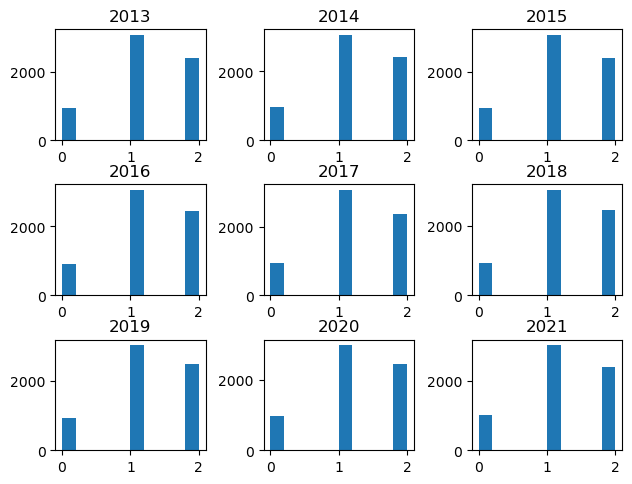

In [11]:
fig, axes = plt.subplots(3, 3)
axes = axes.flatten()
fig.tight_layout()

for i, ax in enumerate(axes):
    label = labels[t0+i]

    ax.hist(label)
    ax.set_title(t0+i)

plt.show()

In [12]:
def min_max_scaler(data):
    min_val = np.min(data)
    max_val = np.max(data)

    normalized_data = (data - min_val) / (max_val - min_val)

    return normalized_data

def standard_normalize(data):
    mean = np.mean(data)
    std_dev = np.std(data)

    standardized_data = (data - mean) / std_dev

    return standardized_data

In [13]:
df_x = pd.read_excel('./resouces/processed/DOT_x_2013_2022.xlsx')
df_m = pd.read_excel('./resouces/processed/DOT_m_2013_2022.xlsx')

for t in ts:
    df_x[t] = standard_normalize(df_x[t].values)
    df_m[t] = standard_normalize(df_m[t].values)

df_x.shape, df_m.shape

((6427, 12), (6427, 12))

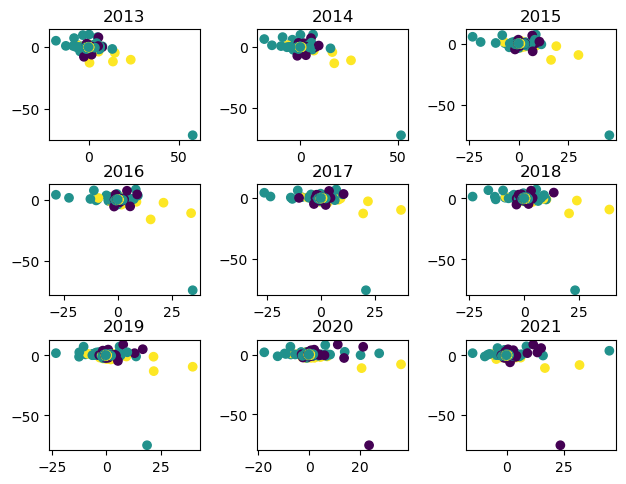

In [14]:
fig, axes = plt.subplots(3, 3)
axes = axes.flatten()
fig.tight_layout()

for i, ax in enumerate(axes):
    t = t0+i

    x = df_x[t].values
    m = df_m[t].values
    label = labels[t]

    ax.scatter(x, m, c=label)
    ax.set_title(t)

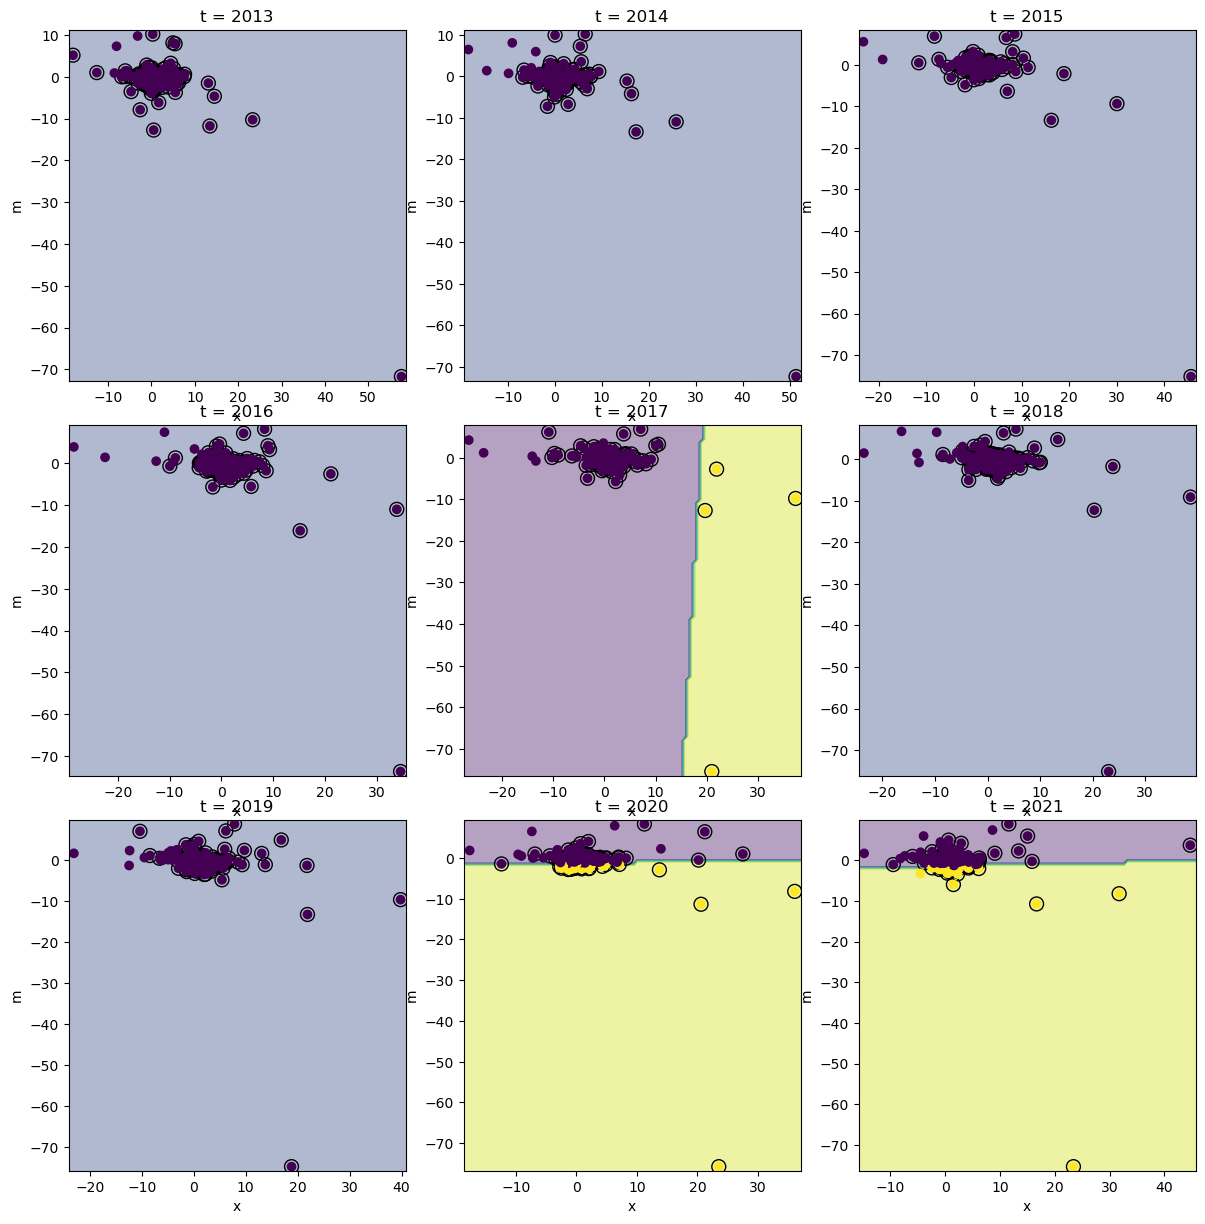

In [33]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
scores = [[],[],[],[],[]]

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.tight_layout()

for i, ax in enumerate(axes.flatten()):
    t = t0 + i

    x = df_x[t]
    m = df_m[t]
    label = labels[t]

    X = np.column_stack((x, m))

    # Fit SVM
    svm = SVC(kernel='linear', C=1.0, random_state=1)
    svm.fit(X, label)
    y = svm.predict(X)

    scores[0].append(metrics.adjusted_rand_score(y, label))
    scores[1].append(metrics.adjusted_mutual_info_score(y, label))
    scores[2].append(metrics.completeness_score(y, label))
    scores[3].append(metrics.v_measure_score(y, label))

    # _, counts = np.unique(y, return_counts=True)
    # print(counts)

    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)

    # Plot support vectors
    ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],
               s=100, facecolors='none', edgecolors='k')

    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis)

    ax.set_xlabel('x')
    ax.set_ylabel('m')
    ax.set_title(f't = {t}')

plt.show()

In [29]:
score_names = {
    0: 'Adjusted Rand Score',
    1: 'Adjusted Mutual Information',
    2: 'Completeness',
    3: 'V-measure'
}

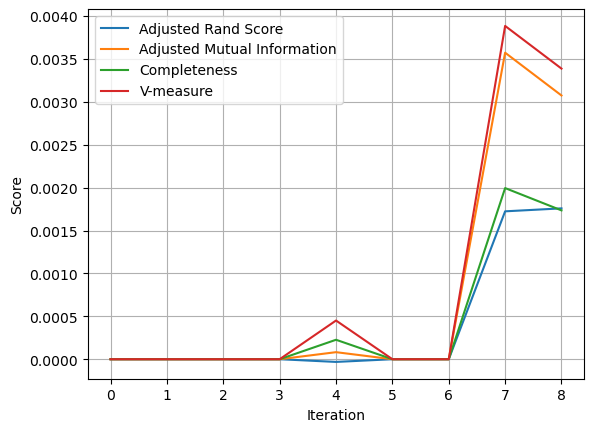

In [31]:
for score, l in zip(scores, score_names):
    plt.plot(score, label=score_names[l])

plt.xlabel('Iteration')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

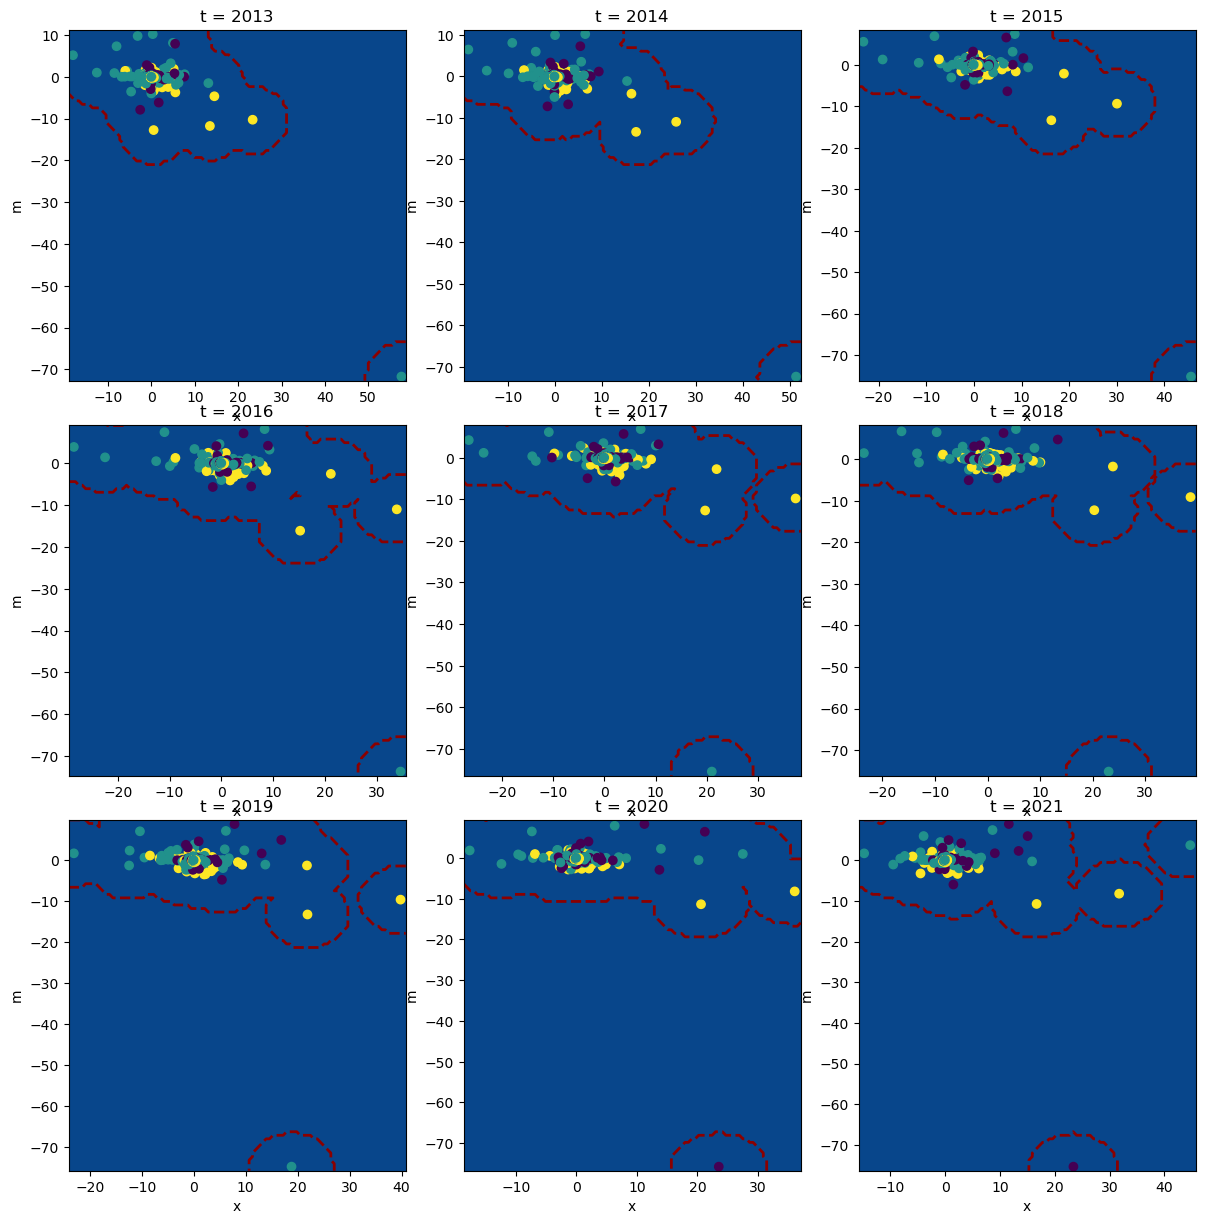

In [24]:
from sklearn.svm import OneClassSVM

# Standardize features
scaler = StandardScaler()

fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.tight_layout()

for i, ax in enumerate(axes.flatten()):
    t = t0 + i

    x = df_x[t]
    m = df_m[t]
    label = labels[t]

    X = np.column_stack((x, m))

    # Fit One-Class SVM
    oc_svm = OneClassSVM(nu=0.2)
    oc_svm.fit(X)
    
    # Predict labels
    # y = oc_svm.predict(X)

    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = oc_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    ax.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)

    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], c=label, cmap=plt.cm.viridis)

    ax.set_xlabel('x')
    ax.set_ylabel('m')
    ax.set_title(f't = {t}')

plt.show()


#### sus countries

In [ ]:
r = 10.0
scaler = StandardScaler()

dfs_outliers = {}
for i, ax in enumerate(axes.flatten()):
    t = t0 + i

    x = scaler.fit_transform(np.array(df_x[t]).reshape(-1, 1))
    m = scaler.fit_transform(np.array(df_m[t]).reshape(-1, 1))
    label = labels[t]

    df = pd.DataFrame([])
    df['x'] = x.flatten()
    df['m'] = m.flatten()
    df.index = df_x[t].index

    df['dist'] = np.sqrt(df['x']**2 + df['m']**2)
    df = df[df['dist'] > r]
    df = df.drop(columns=['dist'])

    dfs_outliers[t] = df

common_indices = set(dfs_outliers[list(dfs_outliers.keys())[0]].index)

for year, df in dfs_outliers.items():
    common_indices = common_indices.intersection(df.index)

common_indices = sorted(list(common_indices))
print("Common rows across all DataFrames:")
print(common_indices)

Common rows across all DataFrames:
[12, 37, 76, 3915, 5000]


In [ ]:
sus_countries_name = set()

for index in common_indices:
    a, b = df_x.iloc[index, :2].values
    sus_countries_name.add(a)
    sus_countries_name.add(b)

sus_countries_name = list(sus_countries_name)
print(sus_countries_name)

sus_countries_code = []
for c in sus_countries_name:
    sus_countries_code.append(cname_ccode_map[c])

print(sus_countries_code)

['United States', 'Mexico', 'Hong Kong', 'China', 'Canada']

In [ ]:
df_fhi[df_fhi.index.isin(sus_countries_code)]

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country Code,,,,,,,,,,,
111,93,92,92,90,89,86,86,86,83,83,83
156,98,98,98,99,99,99,99,98,98,98,98
273,65,65,64,65,65,62,63,62,61,60,60
532,67,67,65,63,61,59,59,55,52,43,42
924,17,17,17,16,15,14,11,10,9,9,9


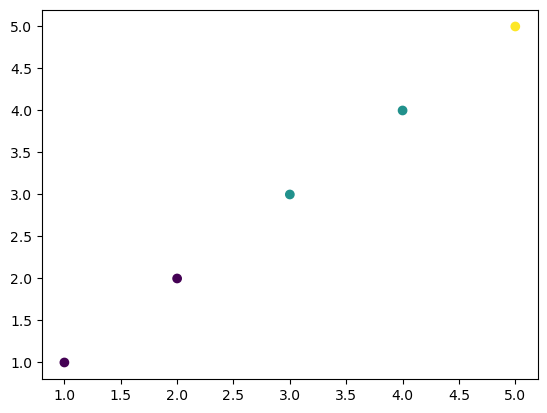

In [ ]:
aa = [1,2,3,4,5]
bb = [1,2,3,4,5]
cc = [0,0,1,1,2]

plt.scatter(aa, bb, c=cc)
plt.show()

#### accumulate from pair

In [ ]:
def accumulate(df):
    df_sum = pd.DataFrame([], columns=df.columns[2:])
    count_dict = {}

    for index, row in tqdm(df.iterrows()):
        i = row['Country Code']
        j = row['Counterpart Country Code']
        v = row[list(ts)].abs()

        if i in count_dict:
            count_dict[i] += 1
        else:
            count_dict[i] = 1

        if j in count_dict:
            count_dict[j] += 1
        else:
            count_dict[j] = 1
            

        if df_sum[df_sum.index == i].empty:
            df_sum.loc[i] = v
        else:
            df_sum.loc[i] += v

        if df_sum[df_sum.index == j].empty:
            df_sum.loc[j] = v
        else:
            df_sum.loc[j] += v

    for index, dem in count_dict.items():
        df_sum.loc[index] /= dem

    df_sum.sort_index(inplace=True)
    df_sum.reset_index(inplace=True)
    df_sum.rename(columns={'index': 'Country Name'}, inplace=True)

    return df_sum

df_x_sum = accumulate(df_x)
df_m_sum = accumulate(df_m)

df_x_sum.shape, df_m_sum.shape

0it [00:00, ?it/s]

0it [00:00, ?it/s]

((190, 11), (190, 11))

In [ ]:
fhi_mean = df_fhi.mean().values
fhi_mean

array([60.36842105, 60.33157895, 60.08947368, 59.78947368, 59.3       ,
       58.9       , 58.61578947, 58.31052632, 57.87894737, 57.27894737,
       57.07368421])

In [ ]:
labels = pd.DataFrame([], columns = df_fhi.columns)

for index, row in df_x_sum.iterrows():
    name = row['Country Name']
    code = cname_ccode_map[name]

    curr_fhi = df_fhi[df_fhi.index == code].values[0]
    label = (curr_fhi > fhi_mean).astype(int)

    labels.loc[name] = label

labels

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Afghanistan,0,0,0,0,0,0,0,0,0,0,0
Albania,1,1,1,1,1,1,1,1,1,1,1
Algeria,0,0,0,0,0,0,0,0,0,0,0
Angola,0,0,0,0,0,0,0,0,0,0,0
Antigua and Barbuda,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,0
Vietnam,0,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,0
Zambia,1,0,0,1,0,0,0,0,0,0,0


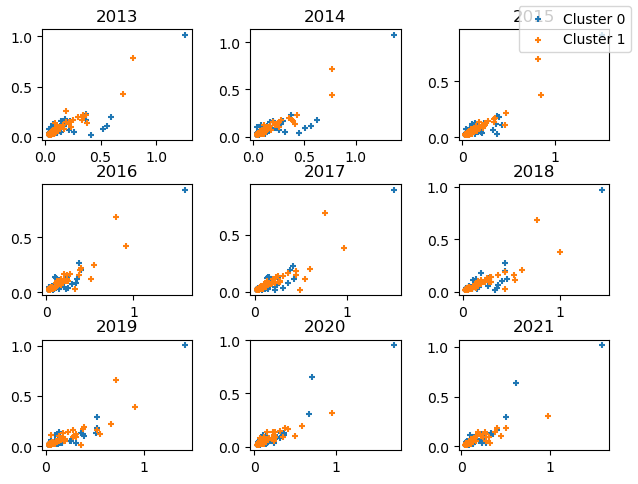

In [ ]:
fig, axes = plt.subplots(3, 3)
axes = axes.flatten()
fig.tight_layout()

scatter_plots = []
cluster_labels = []

for i, ax in enumerate(axes):
    t = t0 + i

    x = df_x_sum[t].values
    m = df_m_sum[t].values
    label = labels[t].values

    for cluster in np.unique(label):
        scatter = ax.scatter(x[label == cluster], m[label == cluster], marker='+', s=20, label=f'Cluster {cluster}')
        scatter_plots.append(scatter)
        cluster_labels.append(f'Cluster {cluster}')

    ax.set_title(t)

unique_labels = list(set(cluster_labels))

# Create a global legend
fig.legend(scatter_plots, unique_labels)

plt.show()
